<a href="https://colab.research.google.com/github/fasthill/ML-DL-study-alone/blob/main/5-3%20%ED%8A%B8%EB%A6%AC%EC%9D%98%20%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 트리의 앙상블

## 랜덤포레스트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.inspection import permutation_importance # .feature_importances_ 대체용으로 사용 추천
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [3]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

In [ ]:
# wine = pd.read_csv('https://bit.ly/wine_csv_data')
# wine.head()

In [18]:
dir_name = '../data/analysis/'
company = 'hyunmotor_ml.csv'
df = pd.read_csv(dir_name+company)

In [19]:
df.describe()

,ixic,ixic_cr,ixic_f,ixic_f_cr,dji,dji_cr,dji_f,dji_f_cr,spx,spx_cr,...,institution_ratio,financial_ratio,invtrust_ratio,pension_ratio,privequity_ratio,bank_ratio,insurance_ratio,financeetc_ratio,corporateetc_ratio,foreigneretc_ratio
count,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,...,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000
mean,12419.621115,0.084082,12613.913595,0.083956,31122.783187,0.048681,31053.605526,0.044804,3853.891962,0.067049,...,-0.362583,0.007440,-0.053475,-0.237357,-0.026860,0.002991,-0.053001,-0.002313,0.215288,0.005900
std,2227.553532,1.842249,2327.847756,1.836820,3949.557961,1.628632,3944.277083,1.597511,590.192591,1.613176,...,2.756478,1.662021,0.670048,1.362449,0.597673,0.091886,0.432451,0.054430,0.677896,0.046140
min,6860.670000,-12.320000,6984.500000,-10.840000,18591.930000,-12.930000,18497.000000,-11.260000,2237.400000,-11.980000,...,-5.000214,-4.824011,-3.030923,-4.115868,-3.249186,-0.482756,-4.082900,-0.705176,-2.357686,-0.237098
25%,10911.590000,-0.720000,11124.750000,-0.770000,28308.460000,-0.520000,28196.000000,-0.500000,3357.750000,-0.540000,...,-2.615745,-0.995236,-0.361855,-1.092216,-0.244661,-0.009089,-0.212562,-0.005790,-0.072306,-0.010183
50%,12850.220000,0.190000,12841.000000,0.190000,31730.040000,0.090000,31652.000000,0.080000,3911.740000,0.140000,...,-0.494814,-0.095668,-0.059984,-0.263737,-0.035142,-0.000686,-0.043020,0.000000,0.060612,0.005195
75%,14154.020000,1.010000,14512.500000,1.050000,34575.310000,0.680000,34490.000000,0.700000,4373.790000,0.820000,...,1.913331,0.989113,0.275699,0.624311,0.191357,0.008212,0.124658,0.004516,0.423250,0.017222
max,16057.440000,9.350000,16575.000000,9.710000,36799.650000,11.370000,36675.000000,11.410000,4796.560000,9.380000,...,5.000102,4.969100,2.733967,4.233113,2.738536,0.791975,3.748117,0.263841,4.671757,0.393953


In [20]:
list1 = df.columns[:60]

In [21]:
list1

Index(['date', 'ixic', 'ixic_cr', 'ixic_f', 'ixic_f_cr', 'dji', 'dji_cr',
       'dji_f', 'dji_f_cr', 'spx', 'spx_cr', 'spx_f', 'spx_f_cr', 'kospi',
       'kospi_cr', 'kosdaq', 'kosdaq_cr', 'wti', 'wti_cr', 'dxy', 'dxy_cr',
       'krw', 'krw_cr', 'bond_usa_10', 'bond_usa_10_cr', 'bond_usa_2',
       'bond_usa_2_cr', 'bond_usa_3m', 'bond_usa_3m_cr', 'bond_kor_10',
       'bond_kor_10_cr', 'bond_kor_2', 'bond_kor_2_cr', 'vix', 'vix_cr', 'sox',
       'sox_cr', 'cpi', 'cpi_anticipated', 'cpi_previous', 'gold', 'gold_cr',
       'fed_rate', 'fed_rate_fore', 'fed_rate_prev', 'fed_rate_ann',
       'fed_rate_imp', 'bok_rate', 'fu_usa_date', 'op_usa_date', 'qw_usa_day',
       'fu_kor_date', 'op_kor_date', 'dw_kor_day', 'dayofweek', 'retail',
       'retail_class', 'retail_cr', 'retail_days', 'foreigner'],
      dtype='object')

In [23]:
list2 = df.columns[60:120]
list2

Index(['foreigner_class', 'foreigner_cr', 'foreigner_days', 'institution',
       'institution_class', 'institution_cr', 'institution_days', 'financial',
       'financial_class', 'financial_cr', 'financial_days', 'invtrust',
       'invtrust_class', 'invtrust_days', 'pension', 'pension_class',
       'pension_cr', 'pension_days', 'privequity', 'privequity_class',
       'privequity_cr', 'privequity_days', 'bank', 'bank_class', 'bank_days',
       'insurance', 'insurance_class', 'insurance_days', 'financeetc',
       'financeetc_class', 'financeetc_days', 'corporateetc',
       'corporateetc_class', 'corporateetc_cr', 'corporateetc_days',
       'foreigneretc', 'foreigneretc_class', 'foreigneretc_days', 'open',
       'high', 'low', 'close', 'close_cr', 'close_cr_class', 'vol',
       'vol_percent', 'total', 'retail_ratio', 'foreigner_ratio',
       'institution_ratio', 'financial_ratio', 'invtrust_ratio',
       'pension_ratio', 'privequity_ratio', 'bank_ratio', 'insurance_ratio',
   

In [9]:
sel_column = ['date', 'ixic_cr', 'dji_cr', 'spx_cr', 'kospi_cr', 'kosdaq_cr', 
              'wti_cr', 'dxy_cr', 'dayofweek', 'retail_cr', 'retail_days', 
              'foreigner_cr', 'foreigner_days', 'institution_cr', 'institution_days', 'close_cr_class']

In [10]:
df = df[sel_column]
df.head()

,date,ixic_cr,dji_cr,spx_cr,kospi_cr,kosdaq_cr,wti_cr,dxy_cr,dayofweek,retail_cr,retail_days,foreigner_cr,foreigner_days,institution_cr,institution_days,close_cr_class
0,2020-01-03,-0.79,-0.81,-0.71,0.06,-0.61,3.06,0.00,5,0.940446,2,0.988541,-2,0.687669,-2,4
1,2020-01-06,0.56,0.24,0.35,-0.98,-2.18,0.35,-0.18,1,-0.937680,3,-0.959054,-3,-0.760630,-3,5
2,2020-01-07,-0.03,-0.42,-0.28,0.95,1.24,-0.90,0.37,2,4.091046,4,4.084790,-4,1.245963,-4,5
3,2020-01-08,0.67,0.56,0.49,-1.11,-3.39,-4.93,0.30,3,0.318948,5,-0.756747,-5,0.840947,-5,3
4,2020-01-09,0.81,0.74,0.67,1.63,3.92,-0.08,0.17,4,0.459043,6,-6.697527,1,0.797866,-6,5


In [12]:
df['close_cr_class'].value_counts()

5    345
4    100
6     67
3     49
7     41
9     13
2     10
8      9
1      3
Name: close_cr_class, dtype: int64

(array([  3.,  10.,  49., 100.,   0., 345.,  67.,  41.,   9.,  13.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

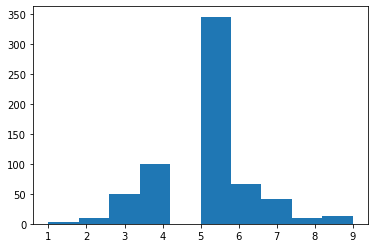

In [13]:
plt.hist(df['close_cr_class'])

(array([  3.,  12., 118., 387.,  91.,  13.,  10.,   1.,   1.,   1.]),
 array([-10.34 ,  -7.364,  -4.388,  -1.412,   1.564,   4.54 ,   7.516,
         10.492,  13.468,  16.444,  19.42 ]),
 <BarContainer object of 10 artists>)

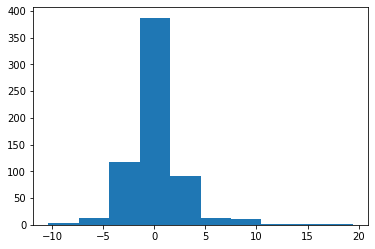

In [25]:
plt.hist(df['close_cr'])

In [ ]:
# data =df.iloc[:, :3].values
# target = wine.iloc[:, -1]

In [ ]:
data =df.loc[:, sel_column].values
target = df.loc[:, 'close_cr_class']

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1, )

In [ ]:
scores = cross_validate(rf,
                        X= train_input, y=train_target,
                        return_train_score=True,  # 훈련데이터 결과도 리턴
#                         cv=3,
                        n_jobs=-1)

In [ ]:
scores

In [ ]:
print('test score : {} \ntrain score: {}'.format(scores['test_score'].mean(), scores['train_score'].mean() ))

In [ ]:
scores_v = cross_val_score(rf,
                        X= train_input, y=train_target,
                        cv=5,
                        n_jobs=-1)

In [ ]:
scores_v

cross_val_score, cross_validate의 차이는 test_score만 공통으로 갖고 있음.

In [ ]:
rf.fit(train_input, train_target)
rf.score(test_input, test_target)

In [ ]:
rf.feature_importances_

OOB(out of bag): 부트스트랩 샘플에 포함되지 않는 샘플. <br> 이것을 검증세트로 이용하여 평가할 수 있음(아래에서 oob_score_True 지정)

In [ ]:
rf_oob = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf_oob.fit(train_input, train_target)

In [ ]:
rf_oob.oob_score_  #위의 test score와 결과가 비슷함

## 엑스트라트리

부트스트랩 샘플 사용하지 않고 즉 결정트리를 만들때 전체 데이터를 사용 <br> 결정트리에서처럼 불순도 게산하지 않고, random으로 feature를 선정하여 무작위로 분할함. <br> 속도가 빠름 == DecisionTreeClassifier 매개변수 splitter='random'로 선정한 트리와 동일

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et,
                        X=train_input, y=train_target,
                        cv=5,
                        return_train_score=True, n_jobs=-1)

In [ ]:
print('train score: {} \n test score: {}'.format(scores['train_score'].mean(), scores['test_score'].mean()))

In [ ]:
et.fit(train_input, train_target)
et.feature_importances_

## 그레이디언트 부스팅

로지스틱 손실함수, 평균제곱오차 손실함수의 오차를 줄이기 위하여 회귀트리를 계속 추가하여 사용. Learning rate를 조정하여 최저점을 벗어나지 않도록 진행. 최초 max_depth=3을 지정하여 정확도가 떨어지나 계속 회귀트리를 추가하여 끌어 올림.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb,
                        X=train_input, y=train_target,
                        return_train_score=True,
                        n_jobs=-1)

In [ ]:
print('train score: {} \n test score: {}'.format(scores['train_score'].mean(), scores['test_score'].mean()))

In [ ]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb,
                        X=train_input, y=train_target,
                        return_train_score=True,
                        n_jobs=-1)

In [ ]:
print('train score: {} \n test score: {}'.format(scores['train_score'].mean(), scores['test_score'].mean()))

In [ ]:
gb.fit(train_input, train_target)
gb.feature_importances_

In [ ]:
gb.score(train_input, train_target)

## 히스토그램 기반 부스팅

255구간으로 나누어 진행. 1개의 빈칸을 준비하고 있는데, 이 곳은 결측치 이상치등을 모아서 진행함. 따라서 결측치 등이 있는 자료를 그대로 사용해도 됨.

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

In [ ]:
print('train score: {} \n test score: {}'.format(scores['train_score'].mean(), scores['test_score'].mean()))

### Permutation Importance <br>
추천하는 feature 중요도 확인 방법

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
hgb = HistGradientBoostingClassifier()
hgb.fit(train_input, train_target)

In [ ]:
result = permutation_importance(hgb,
                                X=train_input, y=train_target,
                                n_repeats=10, random_state=42, n_jobs=-1)

In [ ]:
result

In [ ]:
result['importances_mean']

In [ ]:
result_test = permutation_importance(hgb,
                                X=test_input, y=test_target,
                                n_repeats=10, random_state=42, n_jobs=-1)

In [ ]:
result['importances_mean']

#### XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42) # 'hist': HistGradientBoostingClassifier와 동일한 결과
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

#### LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))